In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
house = pd.read_csv('kc_house_data.csv')
test = pd.read_csv('kc_house_data.csv')
data=pd.read_csv('kc_house_data.csv')

In [3]:
data['waterfront'].unique()

array([0, 1])

In [4]:
pd.set_option('display.max_columns', None)
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Columns

1. id == multinomial
2. date = time
3. price = continuous
4. bedrooms = continuous
5. bathrooms = continuous
6. sqft_living = continuous
7. sqft_lot = continuous
8. floors = continuous
9. waterfront = bool
10. view = ordinal
11. condition = ordinal
12. grade = ordinal
13. sqft_above = continuous
14. sqft_basement = continuous
15. yr_built =
16. yr_renovated =
17. lat
18. long
19. zipcode
17. sqft_living15 = continuous
18. sqft_lot15 = continuous

# EDA

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
target=data['price']

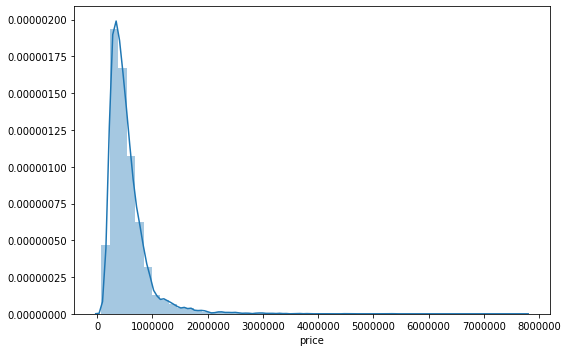

In [8]:
plt.figure(figsize=(8,5))
sns.distplot(target)
plt.tight_layout()

In [9]:
data['price_bin']=pd.cut(data['price'],bins=2,labels = [0,1]
                         )


In [10]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=1000000,copy=True)
data['price_bin']=binarizer.fit_transform(data['price'].values.reshape(-1,1))

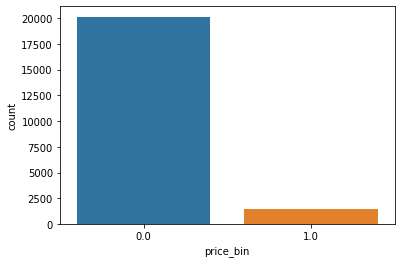

In [11]:
sns.countplot(data['price_bin'])

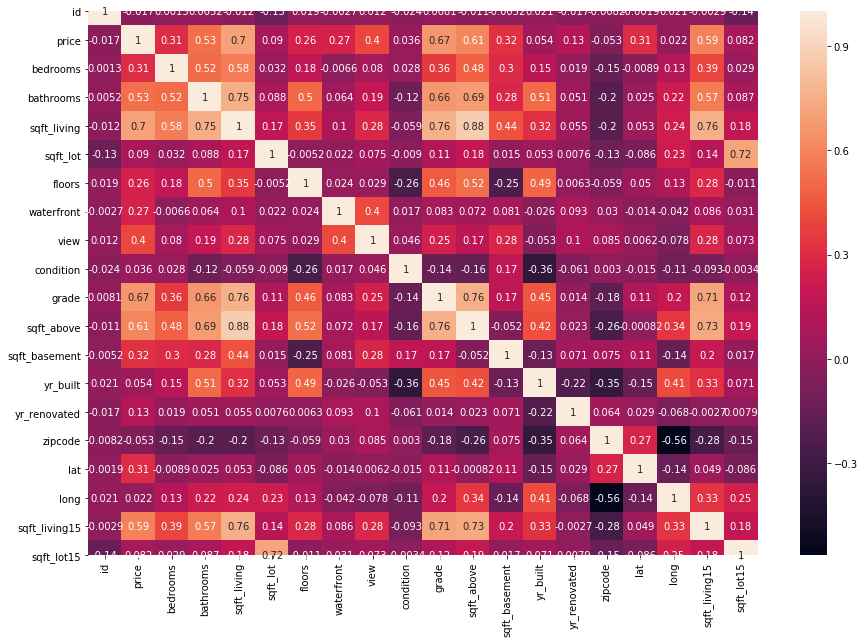

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
sns.heatmap(pd.concat([house],axis=1).corr(),annot=True)

In [13]:
def correlation_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))
    
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [14]:
categorical = ['waterfront','view','condition','grade','zipcode','lat','long']

In [15]:
corr=[]
corr.append([correlation_ratio(house[i],target)for i in categorical])
pd.DataFrame(data=[categorical,corr[0]],index=['column','correlation ratio']).T


,column,correlation ratio
0,waterfront,0.266369
1,view,0.410175
2,condition,0.0829329
3,grade,0.720899
4,zipcode,0.63827
5,lat,0.633538
6,long,0.304208


In [16]:
listItem = []

for col in house.columns:
    listItem.append([col, house[col].dtype, house[col].isna().sum(), round((house[col].isna().sum())/len(house[col])), 
                    house[col].nunique(), list(house[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,id,int64,0,0.0,21436,[5045700090]
1,date,object,0,0.0,372,[20140926T000000]
2,price,float64,0,0.0,4028,[559950.0]
3,bedrooms,int64,0,0.0,13,[33]
4,bathrooms,float64,0,0.0,30,[4.25]
5,sqft_living,int64,0,0.0,1038,[809]
6,sqft_lot,int64,0,0.0,9782,[3795]
7,floors,float64,0,0.0,6,[3.0]
8,waterfront,int64,0,0.0,2,[0]
9,view,int64,0,0.0,5,[3]


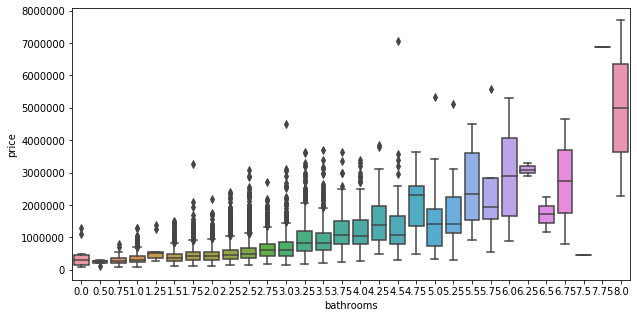

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price',x='bathrooms',data=house)

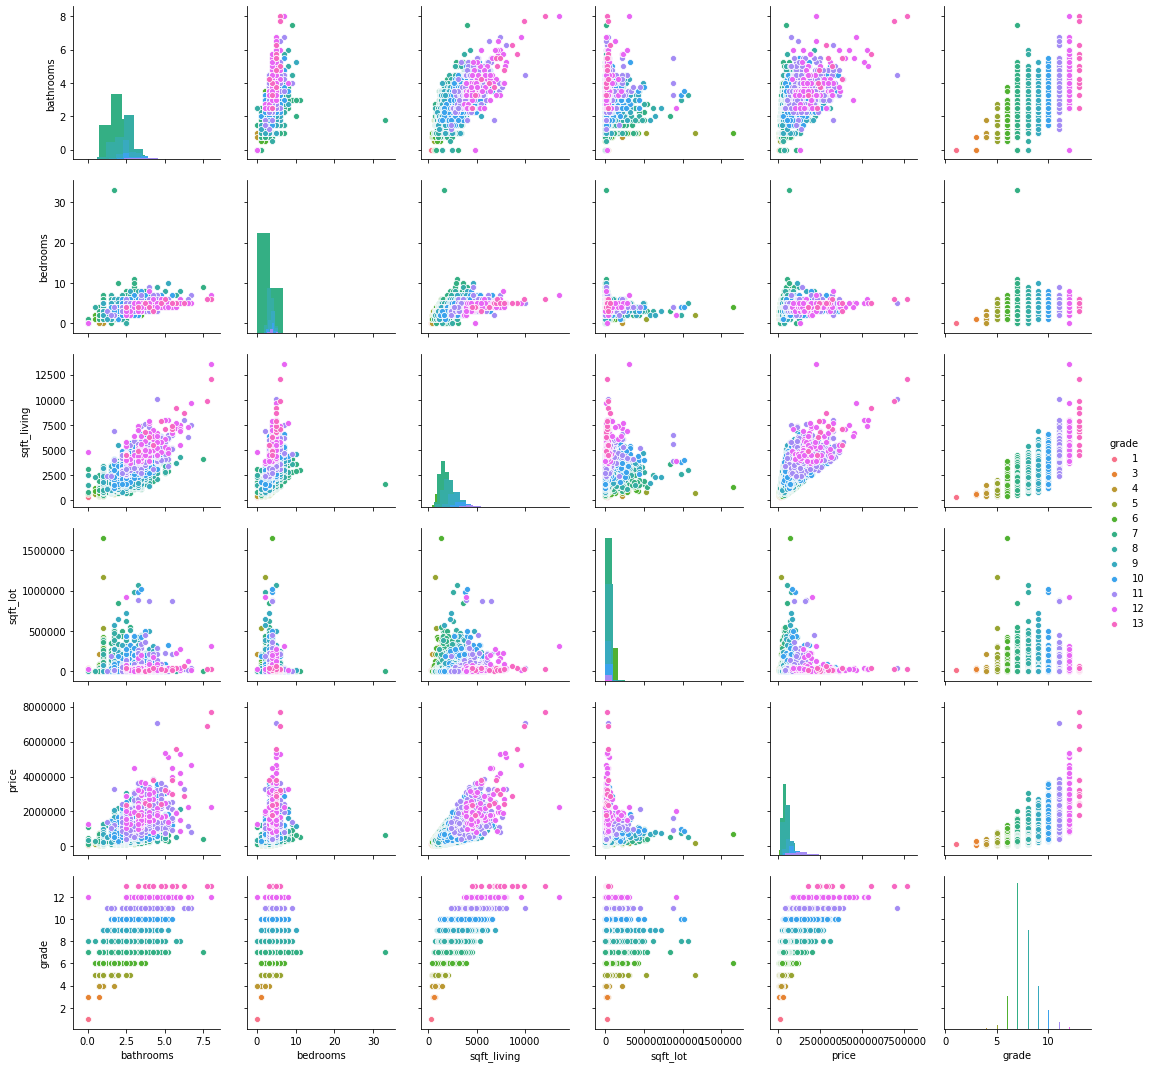

In [18]:
sns.pairplot(house[['bathrooms','bedrooms','sqft_living','sqft_lot','price','grade']],hue='grade',diag_kind='hist')

In [19]:
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(house['condition'], house['grade']).style.background_gradient(cmap = cm)

grade,1,3,4,5,6,7,8,9,10,11,12,13
condition,,,,,,,,,,,,
1,1,0,1,9,11,6,2,0,0,0,0,0
2,0,1,5,15,59,75,13,2,2,0,0,0
3,0,1,13,100,1035,5234,4269,2041,921,332,74,11
4,0,0,10,84,685,2833,1394,446,156,56,13,2
5,0,1,0,34,248,833,390,126,55,11,3,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

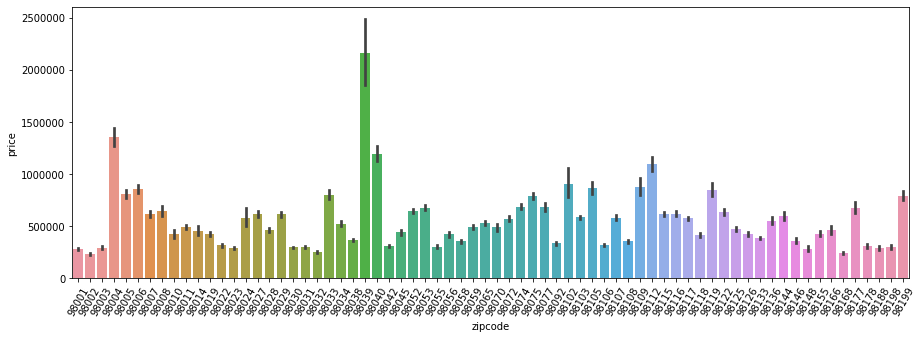

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(house['zipcode'],house['price'])
plt.xticks(rotation = 60)
        

In [21]:
house[house['sqft_lot']>1500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,20150327T000000,700000.0,4,1.0,1300,1651359,1.0,0,3,4,6,1300,0,1920,0,98022,47.2313,-122.023,2560,425581


In [22]:
house.drop(house[house['bedrooms']>30].index,inplace=True)

In [23]:
target=house['price']

In [24]:
from sklearn.model_selection import train_test_split 


# Multi Col

In [25]:
house.drop(['price','date','id','long','lat'], axis=1,inplace=True)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif =[variance_inflation_factor(house.values,j) for j in range(house.shape[1])]
pd.Series(vif,index = house.columns,name = 'VIF')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


bedrooms           25.080711
bathrooms          28.679293
sqft_living              inf
sqft_lot            2.365905
floors             16.696467
waterfront          1.212451
view                1.537673
condition          34.588430
grade             140.691744
sqft_above               inf
sqft_basement            inf
yr_built         8790.966582
yr_renovated        1.192167
zipcode          8598.057815
sqft_living15      26.513811
sqft_lot15          2.582487
Name: VIF, dtype: float64

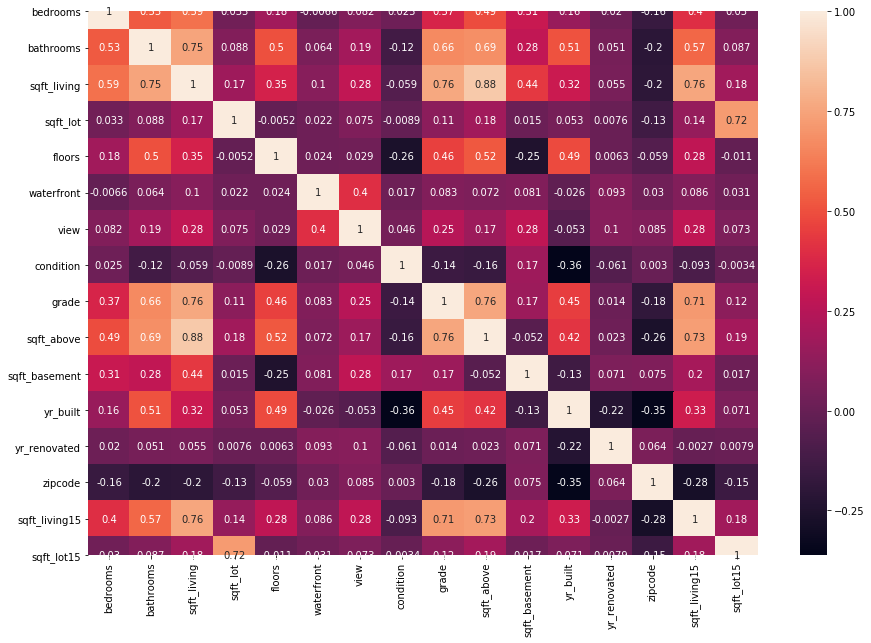

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.concat([house],axis=1).corr(),annot=True)

# Feature Selection

## Sqft_living15

In [28]:
bigger=[]
for idx,row in house.iterrows():
    if row['sqft_living15']<row['sqft_living']:
        bigger.append(1)
    else:
        bigger.append(0)
house['bigger']=bigger

In [29]:
bigger_lot=[]
for idx,row in house.iterrows():
    if row['sqft_lot15']<row['sqft_lot']:
        bigger_lot.append(1)
    else:
        bigger_lot.append(0)
house['bigger_lot']=bigger_lot

## Living Ratio

In [30]:
a=[]
for idx,row in house.iterrows():
    try:
        b=(row['sqft_above']/row['sqft_basement'])
        if b!= float("inf"):
            a.append(b)
        else:
            a.append(0)
    except:
        a.append(0)
house['living ratio']=a

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


## Age

In [31]:
data.loc[0]['date'][:4]

'2014'

In [32]:
age=[]
for i,row in house.iterrows():
    age.append(int(data.loc[i]['date'][:4])-int(house.loc[i]['yr_built']))
house['age']=age
        

## Renovated

In [33]:
ren=[]
for i in house['yr_renovated']:
    if i == 0:
        ren.append(0)
    else:
        ren.append(1)
house['renovated']=ren

## Room

In [34]:
a=[]
for idx,row in house.iterrows():
    a.append(row['bedrooms']*row['bathrooms'])
house['rooms']=a

## Floor

In [35]:
floor=[]
for i in house['floors']:
    floor.append(int(round(i,0)))
house['floor']=floor

## Score

In [36]:
a=[]
for idx,row in house.iterrows():
    try:
        a.append(row['condition']+row['grade'])
    except:
        a.append(0)
house['score']=a

## Zipcode

In [37]:
house['price']=target

In [38]:
price_zipcode=pd.DataFrame(house.groupby("zipcode").mean()['price'])
#mean_price_of_house == 5.400881e+05
price_zipcode

,price
zipcode,
98001,2.808047e+05
98002,2.342840e+05
98003,2.941113e+05
98004,1.355927e+06
98005,8.101649e+05
...,...
98177,6.761854e+05
98178,3.106128e+05
98188,2.890783e+05


In [39]:
expensive_zip=price_zipcode[price_zipcode['price']>=5.40081e+5].index
else_zip=price_zipcode[price_zipcode['price']<5.40081e+5].index

In [40]:
from scipy.stats import mannwhitneyu as mw
results = list(mw(price_zipcode.loc[expensive_zip]['price'],price_zipcode.loc[else_zip]['price']
                 ))
print('U-statisitic',results[0])
print('P-value',results[1])
#H0: the distribution of scores for the two groups are equal
#p-values have to be bigger than the critical p value for the H0 to be accepted

U-statisitic 0.0
P-value 3.9722523169478026e-13


In [41]:
expensive_zip

Int64Index([98004, 98005, 98006, 98007, 98008, 98024, 98027, 98029, 98033,
            98039, 98040, 98052, 98053, 98072, 98074, 98075, 98077, 98102,
            98103, 98105, 98107, 98109, 98112, 98115, 98116, 98117, 98119,
            98122, 98136, 98144, 98177, 98199],
           dtype='int64', name='zipcode')

In [42]:
wealthy_neighbourhood=[]
for i in house['zipcode']:
    if i in expensive_zip:
        wealthy_neighbourhood.append(1)
    else:
        wealthy_neighbourhood.append(0)
house['wealthy_neighbourhood']=wealthy_neighbourhood
  

In [43]:
house_drop=house.drop(['zipcode','price',
                         'sqft_living15','sqft_above','sqft_basement','yr_built','yr_renovated'
                        ,'grade','condition','bedrooms','bathrooms','floors','sqft_lot15'],axis=1)

In [44]:
house_drop

,sqft_living,sqft_lot,waterfront,view,bigger,bigger_lot,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,1180,5650,0,0,0,0,0.000000,59,0,3.00,1,10.0,0
1,2570,7242,0,0,1,0,5.425000,63,1,6.75,2,10.0,0
2,770,10000,0,0,0,1,0.000000,82,0,2.00,1,9.0,0
3,1960,5000,0,0,1,0,1.153846,49,0,12.00,1,12.0,1
4,1680,8080,0,0,0,1,0.000000,28,0,6.00,1,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,0,0,0,0,0.000000,5,0,7.50,3,11.0,1
21609,2310,5813,0,0,1,0,0.000000,1,0,10.00,2,11.0,0
21610,1020,1350,0,0,0,0,0.000000,5,0,1.50,2,10.0,1
21611,1600,2388,0,0,1,1,0.000000,11,0,7.50,2,11.0,1


In [45]:

vif =[variance_inflation_factor(house_drop.values,j) for j in range(house_drop.shape[1])]
pd.Series(vif,index = house_drop.columns,name = 'VIF')

sqft_living              23.464290
sqft_lot                  1.213008
waterfront                1.211093
view                      1.445407
bigger                    2.505085
bigger_lot                1.718868
living ratio              1.246918
age                       4.232161
renovated                 1.148179
rooms                    11.444866
floor                    10.679190
score                    28.560848
wealthy_neighbourhood     2.084721
Name: VIF, dtype: float64

## Standardize

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [47]:
house_ss=house_drop
house_ss.head()

,sqft_living,sqft_lot,waterfront,view,bigger,bigger_lot,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,1180,5650,0,0,0,0,0.000000,59,0,3.00,1,10.0,0
1,2570,7242,0,0,1,0,5.425000,63,1,6.75,2,10.0,0
2,770,10000,0,0,0,1,0.000000,82,0,2.00,1,9.0,0
3,1960,5000,0,0,1,0,1.153846,49,0,12.00,1,12.0,1
4,1680,8080,0,0,0,1,0.000000,28,0,6.00,1,11.0,1


In [48]:
X_train, X_test, y_train , y_test = train_test_split(house_ss,target,test_size = 0.25, random_state = 105)

In [49]:
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head()

,sqft_living,sqft_lot,waterfront,view,bigger,bigger_lot,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,-0.761320,-0.189910,-0.085268,-0.305623,-0.906785,-0.814022,0.518505,-0.353278,-0.211974,-0.529216,-0.959498,-0.839586,-0.918025
1,0.072562,-0.182815,-0.085268,-0.305623,1.102797,-0.814022,0.129891,-0.285032,-0.211974,0.007416,-0.959498,-0.040710,-0.918025
2,-0.026187,-0.151900,-0.085268,2.302346,-0.906785,-0.814022,1.339265,-0.523893,-0.211974,0.603674,-0.959498,0.758165,-0.918025
3,-0.827153,-0.171624,-0.085268,-0.305623,-0.906785,-0.814022,-0.447862,0.670412,-0.211974,-0.708093,-0.959498,-0.040710,1.089295
4,-0.113964,-0.311154,-0.085268,-0.305623,1.102797,1.228468,1.757514,-1.274600,-0.211974,-0.171461,0.843273,-0.040710,-0.918025


In [50]:
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_test.head()

,sqft_living,sqft_lot,waterfront,view,bigger,bigger_lot,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,-0.212713,-0.191055,-0.085268,-0.305623,1.102797,1.228468,-0.005912,-0.182663,-0.211974,-0.111836,-0.959498,-0.839586,-0.918025
1,-1.002707,-0.342629,-0.085268,-0.305623,-0.906785,-0.814022,0.807005,-1.206354,-0.211974,-1.065848,0.843273,-0.839586,-0.918025
2,0.434643,-0.134566,-0.085268,0.998362,-0.906785,-0.814022,0.216230,0.295059,-0.211974,-0.529216,-0.959498,-0.040710,-0.918025
3,0.313949,-0.274681,-0.085268,-0.305623,1.102797,1.228468,1.599632,-1.206354,-0.211974,2.094318,0.843273,-0.040710,-0.918025
4,0.807695,-0.048649,-0.085268,-0.305623,1.102797,-0.814022,-0.047721,0.226813,-0.211974,1.498060,-0.959498,-0.040710,1.089295


In [51]:
vif =[variance_inflation_factor(X_train.values,j) for j in range(X_train.shape[1])]
pd.Series(vif,index = house_ss.columns,name = 'VIF')

sqft_living              4.233360
sqft_lot                 1.071105
waterfront               1.190180
view                     1.329032
bigger                   1.364027
bigger_lot               1.042660
living ratio             1.027725
age                      1.486173
renovated                1.099066
rooms                    2.770716
floor                    1.314105
score                    2.039200
wealthy_neighbourhood    1.203329
Name: VIF, dtype: float64

# Regression w new features

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lm=LinearRegression() #--> creates the linear regression equation
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
lm.intercept_

536478.327534086

In [55]:
pd.DataFrame(index=X_train.columns,data=lm.coef_,columns=['Coefficient'])

,Coefficient
sqft_living,193672.466731
sqft_lot,-5320.858778
waterfront,57638.967360
view,36714.997019
bigger,-34572.026159
bigger_lot,-221.036752
living ratio,8421.707477
age,46642.755320
renovated,13226.232130
rooms,7089.156706


In [56]:
metrics.r2_score(y_train,lm.predict(X_train))

0.7063965005487279

In [57]:
predictions=lm.predict(X_test)
predictions

array([268342.41103859, 152151.25324187, 586413.42767105, ...,
       396204.14577594, 773977.17153867, 734284.80436733])

In [58]:
r=metrics.r2_score(y_test,predictions)
r

0.716202126727099

In [59]:
#VIF

1/(1-r)

3.523634580018141

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 123991.28494778313
MSE: 40321111260.330826
RMSE: 200801.1734535703


In [61]:
import statsmodels.api as sm
from statsmodels.api import OLS
sm_lm =OLS(y_train.as_matrix(), sm.add_constant(X_train))
result=sm_lm.fit()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2997.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        11:49:51   Log-Likelihood:            -2.2061e+05
No. Observations:               16209   AIC:                         4.412e+05
Df Residuals:                   16195   BIC:                         4.414e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.365e+05   1548.700    346.406      0.000    5.33e+05     5.4e+05
sqft_living            1.937e+05   3186.470     60.780      0.000    1.87e+05       2e+05
sqft_lot              -5320.8588   1602.814     -3.320      0.001   -8462.552   -2179.166
waterfront             5.764e+04   1689.559     34.115      0.000    5.43e+04     6.1e+04
view                   3.671e+04   1785.397     20.564      0.000    3.32e+04    4.02e+04
bigger                -3.457e+04   1808.751    -19.114      0.000   -3.81e+04    -3.1e+04
bigger_lot             -221.0368   1581.388     -0.140      0.889   -3320.732    2878.659
living ratio           8421.7075   1570.022      5.364      0.000    5344.291    1.15e+04
age                    4.664e+04   1888.000     24.705      0.000    4.29e+04    5.03e+04
renovated              1.323e+04   1623.601      8.146      0.000       1e+04    1.64e+04
rooms                  7089.1567   2577.883      2.750      0.006    2036.221    1.21e+04
floor                  7621.8055   1775.343      4.293      0.000    4141.937    1.11e+04
score                  6.759e+04   2211.552     30.564      0.000    6.33e+04    7.19e+04
wealthy_neighbourhood  1.059e+05   1698.867     62.318      0.000    1.03e+05    1.09e+05
==============================================================================
Omnibus:                    15164.662   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2064024.825
Skew:                           4.087   Prob(JB):                         0.00
Kurtosis:                      57.675   Cond. No.                         4.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Drop Feature

In [63]:
#house_ss=house_drop.drop(['Mahalanobis','rooms','p-value','Out'],axis=1)
house_ss=house_drop.drop('bigger_lot',axis=1)
house_ss.head()

,sqft_living,sqft_lot,waterfront,view,bigger,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,1180,5650,0,0,0,0.000000,59,0,3.00,1,10.0,0
1,2570,7242,0,0,1,5.425000,63,1,6.75,2,10.0,0
2,770,10000,0,0,0,0.000000,82,0,2.00,1,9.0,0
3,1960,5000,0,0,1,1.153846,49,0,12.00,1,12.0,1
4,1680,8080,0,0,0,0.000000,28,0,6.00,1,11.0,1


In [231]:
X_train, X_test, y_train , y_test = train_test_split(house_ss,target,test_size = 0.25, random_state = 105)

In [232]:
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)


In [233]:
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)


In [234]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
pd.DataFrame(index=X_train.columns,data=lm.coef_,columns=['Coefficient'])

,Coefficient
sqft_living,193644.112746
sqft_lot,-5349.831874
waterfront,57638.891830
view,36713.927379
bigger,-34578.821409
living ratio,8423.764285
age,46643.229053
renovated,13229.938846
rooms,7090.027044
floor,7634.598198


In [236]:
predictions=lm.predict(X_test)
predictions

array([268594.52993034, 152015.77255583, 586209.55174824, ...,
       396490.52959906, 773805.94955832, 734125.53002893])

In [237]:
r=metrics.r2_score(y_test,predictions)
r

0.7161949130409964

In [238]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 123993.80191676051
MSE: 40322136158.21532
RMSE: 200803.72545900467


In [239]:
import statsmodels.api as sm
from statsmodels.api import OLS


In [240]:
y_train

2804     195000.0
9341     339950.0
11241    403900.0
15938    500000.0
20192    415000.0
           ...   
6944     499000.0
15588    435000.0
73       360000.0
11030    235000.0
12917    226000.0
Name: price, Length: 16209, dtype: float64

In [241]:
model=OLS(y_train.as_matrix(),sm.add_constant(X_train))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [242]:
model_fit=model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     3247.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:18:06   Log-Likelihood:            -2.2061e+05
No. Observations:               16209   AIC:                         4.412e+05
Df Residuals:                   16196   BIC:                         4.413e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.365e+05   1548.653    346.416      0.000    5.33e+05     5.4e+05
sqft_living            1.936e+05   3179.910     60.896      0.000    1.87e+05       2e+05
sqft_lot              -5349.8319   1589.306     -3.366      0.001   -8465.047   -2234.617
waterfront             5.764e+04   1689.508     34.116      0.000    5.43e+04     6.1e+04
view                   3.671e+04   1785.327     20.564      0.000    3.32e+04    4.02e+04
bigger                -3.458e+04   1808.043    -19.125      0.000   -3.81e+04    -3.1e+04
living ratio           8423.7643   1569.905      5.366      0.000    5346.576    1.15e+04
age                    4.664e+04   1887.940     24.706      0.000    4.29e+04    5.03e+04
renovated              1.323e+04   1623.335      8.150      0.000       1e+04    1.64e+04
rooms                  7090.0270   2577.798      2.750      0.006    2037.259    1.21e+04
floor                  7634.5982   1772.929      4.306      0.000    4159.462    1.11e+04
score                   6.76e+04   2211.335     30.569      0.000    6.33e+04    7.19e+04
wealthy_neighbourhood  1.059e+05   1697.800     62.362      0.000    1.03e+05    1.09e+05
==============================================================================
Omnibus:                    15164.641   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2064082.884
Skew:                           4.087   Prob(JB):                         0.00
Kurtosis:                      57.675   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 123993.80191676051
MSE: 40322136158.21532
RMSE: 200803.72545900467


# Normality of Residuals

In [244]:
from scipy.stats import shapiro,normaltest,anderson

def try_normal(data):
    
    result = {'Anderson': {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])},'Shapiro p value':shapiro(data)[1],
               'K^2':normaltest(data)[1]}
    result ['Anderson']['stat'] =anderson(data)[0]
    return result


In [245]:
try_normal(model_fit.resid)

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 509.09029466269567},
 'Shapiro p value': 0.0,
 'K^2': 0.0}

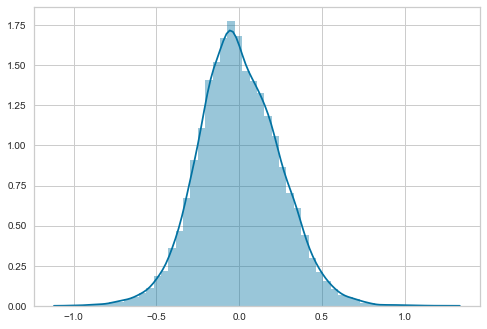

In [246]:
sns.distplot(result.resid)

## OUtlier

In [84]:
house_ss

,sqft_living,sqft_lot,waterfront,view,bigger,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,1180,5650,0,0,0,0.000000,59,0,3.00,1,10.0,0
1,2570,7242,0,0,1,5.425000,63,1,6.75,2,10.0,0
2,770,10000,0,0,0,0.000000,82,0,2.00,1,9.0,0
3,1960,5000,0,0,1,1.153846,49,0,12.00,1,12.0,1
4,1680,8080,0,0,0,0.000000,28,0,6.00,1,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,0,0,0,0.000000,5,0,7.50,3,11.0,1
21609,2310,5813,0,0,1,0.000000,1,0,10.00,2,11.0,0
21610,1020,1350,0,0,0,0.000000,5,0,1.50,2,10.0,1
21611,1600,2388,0,0,1,0.000000,11,0,7.50,2,11.0,1


In [85]:
model = OLS(target.as_matrix(), sm.add_constant(house_ss))
a = model.fit()
a.summary()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     4393.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:07:00   Log-Likelihood:            -2.9424e+05
No. Observations:               21612   AIC:                         5.885e+05
Df Residuals:                   21599   BIC:                         5.886e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.785e+05   1.53e+04    -44.450      0.000   -7.08e+05   -6.49e+05
sqft_living             218.0814      3.019     72.226      0.000     212.163     224.000
sqft_lot                 -0.0812      0.033     -2.434      0.015      -0.147      -0.016
waterfront             6.302e+05   1.71e+04     36.927      0.000    5.97e+05    6.64e+05
view                   5.093e+04   2038.847     24.980      0.000    4.69e+04    5.49e+04
bigger                -6.898e+04   3160.760    -21.823      0.000   -7.52e+04   -6.28e+04
living ratio           3548.1918    538.304      6.591      0.000    2493.076    4603.307
age                    1529.4039     55.927     27.346      0.000    1419.782    1639.026
renovated              6.746e+04   7016.685      9.614      0.000    5.37e+04    8.12e+04
rooms                   531.2752    530.487      1.001      0.317    -508.518    1571.068
floor                  1.356e+04   2775.172      4.887      0.000    8123.643     1.9e+04
score                  5.271e+04   1535.717     34.323      0.000    4.97e+04    5.57e+04
wealthy_neighbourhood  2.167e+05   2959.924     73.196      0.000    2.11e+05    2.22e+05
==============================================================================
Omnibus:                    19258.814   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2121341.890
Skew:                           3.833   Prob(JB):                         0.00
Kurtosis:                      50.927   Cond. No.                     5.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
influence =a.get_influence()

In [91]:
resid_student=influence.resid_studentized_external
#here we are standardizing the data using the student distribution ( basically making a z-score data)



In [95]:
resid=house_drop
resid["studentized Residual"]=resid_student
#resid['studentized ']=res_stds

In [96]:

resid

,sqft_living,sqft_lot,waterfront,view,bigger,bigger_lot,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood,studentized Residual
0,1180,5650,0,0,0,0,0.000000,59,0,3.00,1,10.0,0,0.055538
1,2570,7242,0,0,1,0,5.425000,63,1,6.75,2,10.0,0,-0.077394
2,770,10000,0,0,0,1,0.000000,82,0,2.00,1,9.0,0,0.388599
3,1960,5000,0,0,1,0,1.153846,49,0,12.00,1,12.0,1,-0.119947
4,1680,8080,0,0,0,1,0.000000,28,0,6.00,1,11.0,1,-0.168200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,0,0,0,0,0.000000,5,0,7.50,3,11.0,1,-0.727013
21609,2310,5813,0,0,1,0,0.000000,1,0,10.00,2,11.0,0,0.153399
21610,1020,1350,0,0,0,0,0.000000,5,0,1.50,2,10.0,1,0.398641
21611,1600,2388,0,0,1,1,0.000000,11,0,7.50,2,11.0,1,-0.230848


In [97]:
#empirical RuLE
idx_drop=resid[(resid['studentized Residual'] > 3)|(resid['studentized Residual'] < -3)].index

outlier=pd.DataFrame(resid.loc[idx_drop])
outlier['price']=target[idx_drop]
pd.reset_option('display.max_row',None)
#data.loc[idx_drop]
outlier


,sqft_living,sqft_lot,waterfront,view,bigger,bigger_lot,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood,studentized Residual,price
21,3050,44867,0,4,0,1,3.236111,46,0,8.25,1,12.0,1,4.370833,2000000.0
153,5180,19850,0,3,1,1,2.158537,9,0,13.00,2,15.0,1,3.305448,2250000.0
230,1450,15798,1,4,0,1,5.590909,100,1,3.50,2,10.0,0,-3.101583,655000.0
239,4410,14034,0,2,1,1,1.140777,49,0,15.00,1,13.0,0,-3.177855,472000.0
246,3650,8354,1,4,1,0,1.005495,14,0,10.00,1,12.0,1,3.169106,2400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,3790,8797,0,0,1,0,6.580000,9,0,15.00,2,14.0,1,3.840173,1865000.0
21530,5090,14823,0,0,1,1,4.593407,2,0,15.00,1,14.0,1,8.317005,3000000.0
21568,3830,8963,0,0,1,0,4.394366,1,0,14.00,2,13.0,1,3.331762,1700000.0
21576,4850,10584,1,4,1,0,2.702290,8,0,22.50,2,13.0,1,7.413651,3567000.0


In [98]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=2000000,copy=True)
outlier['price_bin']=binarizer.fit_transform(outlier['price'].values.reshape(-1,1))

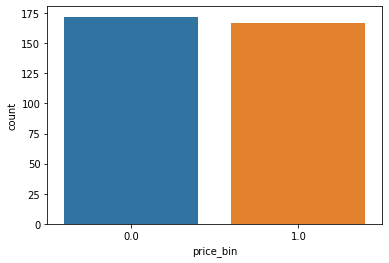

In [100]:
sns.countplot(outlier['price_bin'])

## Mahalanobis

In [102]:
from mahalanobis import Mahalanobis


In [ ]:
#house_drop.drop(['Mahalanobis','p-value','Out'],axis=1,inplace=True)

In [ ]:
#data=house_drop.drop('price',axis=1)

In [103]:
house_drop['price']=house['price']

In [104]:
house['Mahalanobis']=Mahalanobis(np.array(house_drop.drop(['studentized Residual'],axis=1))
                                               ,len(house_drop)).distances

In [105]:
from scipy.stats import chi2
chi2.ppf((1-0.01),df=11)

24.724970311318277

In [106]:
chi2.cdf(house['Mahalanobis'],11)

array([0.00087985, 0.10896291, 0.00478523, ..., 0.01205453, 0.01251499,
       0.01128261])

In [107]:
house['p-value']= 1-chi2.cdf(house['Mahalanobis'],11)


In [108]:
def name_outlier(col):
    if col<0.05:
        return'outlier'
    else:
        return 'not outlier'
house['Out']=house['p-value'].apply(name_outlier)

In [110]:
mahalanobis_out=list((house[house['Out']=='outlier'].index))

In [114]:
idx_drop=list(idx_drop)

In [115]:
idx_drop.extend(mahalanobis_out)

In [116]:
idx_drop

[21,
 153,
 230,
 239,
 246,
 264,
 269,
 282,
 300,
 312,
 326,
 457,
 518,
 577,
 656,
 779,
 814,
 947,
 1031,
 1164,
 1199,
 1261,
 1272,
 1282,
 1315,
 1433,
 1448,
 1584,
 1622,
 1676,
 1732,
 1770,
 1786,
 1921,
 1945,
 1949,
 2040,
 2046,
 2085,
 2181,
 2267,
 2320,
 2444,
 2473,
 2563,
 2626,
 2713,
 2790,
 2864,
 2899,
 2974,
 3039,
 3091,
 3204,
 3229,
 3252,
 3258,
 3281,
 3344,
 3384,
 3687,
 3735,
 3748,
 3761,
 3777,
 3813,
 3829,
 3861,
 3871,
 3914,
 3954,
 4024,
 4032,
 4035,
 4149,
 4190,
 4268,
 4339,
 4411,
 4859,
 4912,
 4922,
 4923,
 5029,
 5433,
 5449,
 5589,
 5617,
 5680,
 5690,
 5702,
 5880,
 5935,
 5967,
 6045,
 6195,
 6197,
 6243,
 6335,
 6355,
 6402,
 6499,
 6508,
 6691,
 6714,
 6740,
 6771,
 6783,
 6794,
 6823,
 6868,
 7002,
 7035,
 7191,
 7231,
 7252,
 7311,
 7313,
 7319,
 7415,
 7432,
 7506,
 7652,
 7907,
 7911,
 7933,
 7989,
 8092,
 8156,
 8191,
 8222,
 8277,
 8337,
 8344,
 8443,
 8450,
 8539,
 8540,
 8638,
 9073,
 9085,
 9254,
 9322,
 9487,
 9573,
 960

In [117]:
#remove duplicate
idx_drop=list(set(idx_drop))

In [118]:
house.loc[idx_drop]['price'].describe()

count    3.540000e+02
mean     2.049434e+06
std      1.060946e+06
min      1.638000e+05
25%      1.550000e+06
50%      1.970110e+06
75%      2.534250e+06
max      7.700000e+06
Name: price, dtype: float64

# IQR

In [119]:
house.describe()['price']

count    2.161200e+04
mean     5.400835e+05
std      3.671351e+05
min      7.500000e+04
25%      3.218375e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [120]:
iqr=6.450000e+05-3.218375e+05

In [121]:
3.218375e+05-(1.5*iqr)

-162906.25

In [122]:
house_outlier2=house_ss.drop(idx_drop)
target_outlier2=target.drop(idx_drop)

# Regression without outlier

In [125]:
house_outlier2.head()

,sqft_living,sqft_lot,waterfront,view,bigger,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,1180,5650,0,0,0,0.000000,59,0,3.00,1,10.0,0
1,2570,7242,0,0,1,5.425000,63,1,6.75,2,10.0,0
2,770,10000,0,0,0,0.000000,82,0,2.00,1,9.0,0
3,1960,5000,0,0,1,1.153846,49,0,12.00,1,12.0,1
4,1680,8080,0,0,0,0.000000,28,0,6.00,1,11.0,1


In [ ]:
#house_outlier2.drop('price',axis=1,inplace=True)

In [305]:
X_train, X_test, y_train , y_test = train_test_split(house_outlier2,target_outlier2,test_size=0.25,random_state=101)

In [306]:
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)


In [307]:
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)


In [308]:
X_test

,sqft_living,sqft_lot,waterfront,view,bigger,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood
0,-1.607526,-0.347661,-0.069208,-0.295391,-0.909203,-0.493735,1.792565,-0.209284,-1.589014,-0.962780,-1.661352,1.097084
1,0.499936,-0.230120,-0.069208,-0.295391,1.099865,-0.493735,-1.067916,-0.209284,0.027136,0.841782,-0.024031,1.097084
2,-1.121189,-0.304171,-0.069208,-0.295391,-0.909203,-0.493735,0.805018,-0.209284,-1.340376,-0.962780,-0.024031,1.097084
3,0.939956,0.996745,-0.069208,-0.295391,1.099865,0.150806,-0.216583,-0.209284,-0.097183,-0.962780,-0.024031,1.097084
4,2.144220,-0.177491,-0.069208,-0.295391,1.099865,-0.493735,-1.204130,-0.209284,1.643287,0.841782,1.613289,1.097084
...,...,...,...,...,...,...,...,...,...,...,...,...
5310,-0.403262,-0.227916,-0.069208,-0.295391,1.099865,-0.493735,-0.863596,-0.209284,0.648732,0.841782,-0.842692,-0.911507
5311,-0.380103,-0.172818,-0.069208,-0.295391,1.099865,-0.493735,0.123951,-0.209284,0.027136,-0.962780,-0.024031,-0.911507
5312,0.241714,-0.126772,-0.069208,-0.295391,1.099865,0.167126,-1.170076,-0.209284,1.891925,-0.962780,-0.024031,-0.911507
5313,-0.727487,-0.389035,-0.069208,-0.295391,1.099865,1.271078,-1.272237,-0.209284,-0.718779,0.841782,-0.024031,1.097084


In [309]:
lm=LinearRegression() #--> creates the linear regression equation
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [310]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
lm.intercept_

514836.92429279303

In [312]:
pd.DataFrame(index=X_train.columns,data=lm.coef_,columns=['Coefficient'])

,Coefficient
sqft_living,142625.476810
sqft_lot,2522.596484
waterfront,41145.699173
view,35094.658535
bigger,-20132.721591
living ratio,8109.377808
age,34195.570878
renovated,12923.707796
rooms,-1443.411788
floor,12824.185466


In [313]:
predictions=lm.predict(X_test)
predictions

array([345528.91835428, 628546.4696348 , 480471.8614296 , ...,
       362449.47840621, 461485.13479812, 469653.123005  ])

In [314]:
metrics.r2_score(y_test,predictions)

0.7608632581296192

In [315]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99141.83218916842
MSE: 18789295733.880806
RMSE: 137074.05200795957


In [316]:
import statsmodels.api as sm
from statsmodels.api import OLS
sm_lm =OLS(y_train.as_matrix(), sm.add_constant(X_train))
result=sm_lm.fit()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [317]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     4452.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:23:58   Log-Likelihood:            -2.1104e+05
No. Observations:               15943   AIC:                         4.221e+05
Df Residuals:                   15930   BIC:                         4.222e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.148e+05   1075.131    478.860      0.000    5.13e+05    5.17e+05
sqft_living            1.426e+05   2168.885     65.760      0.000    1.38e+05    1.47e+05
sqft_lot               2522.5965   1109.272      2.274      0.023     348.298    4696.895
waterfront             4.115e+04   1143.893     35.970      0.000    3.89e+04    4.34e+04
view                   3.509e+04   1203.937     29.150      0.000    3.27e+04    3.75e+04
bigger                -2.013e+04   1260.757    -15.969      0.000   -2.26e+04   -1.77e+04
living ratio           8109.3778   1095.948      7.399      0.000    5961.196    1.03e+04
age                     3.42e+04   1323.712     25.833      0.000    3.16e+04    3.68e+04
renovated              1.292e+04   1126.753     11.470      0.000    1.07e+04    1.51e+04
rooms                 -1443.4118   1763.957     -0.818      0.413   -4900.967    2014.143
floor                  1.282e+04   1232.695     10.403      0.000    1.04e+04    1.52e+04
score                  6.083e+04   1508.073     40.336      0.000    5.79e+04    6.38e+04
wealthy_neighbourhood  1.023e+05   1176.456     86.991      0.000       1e+05    1.05e+05
==============================================================================
Omnibus:                     3318.830   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11465.588
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                       6.604   Cond. No.                         4.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F Statistic','p-value']
test = sms.het_goldfeldquandt(result.resid,result.model.exog)
lzip(name,test)

[('F Statistic', 1.0195552395580738), ('p-value', 0.1938452363397853)]

# drop

In [319]:
X_train, X_test, y_train , y_test = train_test_split(house_outlier2.drop('rooms',axis=1),target_outlier2,test_size=0.25,random_state=101)

In [320]:
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)


In [321]:
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)


In [322]:
X_test

,sqft_living,sqft_lot,waterfront,view,bigger,living ratio,age,renovated,floor,score,wealthy_neighbourhood
0,-1.607526,-0.347661,-0.069208,-0.295391,-0.909203,-0.493735,1.792565,-0.209284,-0.962780,-1.661352,1.097084
1,0.499936,-0.230120,-0.069208,-0.295391,1.099865,-0.493735,-1.067916,-0.209284,0.841782,-0.024031,1.097084
2,-1.121189,-0.304171,-0.069208,-0.295391,-0.909203,-0.493735,0.805018,-0.209284,-0.962780,-0.024031,1.097084
3,0.939956,0.996745,-0.069208,-0.295391,1.099865,0.150806,-0.216583,-0.209284,-0.962780,-0.024031,1.097084
4,2.144220,-0.177491,-0.069208,-0.295391,1.099865,-0.493735,-1.204130,-0.209284,0.841782,1.613289,1.097084
...,...,...,...,...,...,...,...,...,...,...,...
5310,-0.403262,-0.227916,-0.069208,-0.295391,1.099865,-0.493735,-0.863596,-0.209284,0.841782,-0.842692,-0.911507
5311,-0.380103,-0.172818,-0.069208,-0.295391,1.099865,-0.493735,0.123951,-0.209284,-0.962780,-0.024031,-0.911507
5312,0.241714,-0.126772,-0.069208,-0.295391,1.099865,0.167126,-1.170076,-0.209284,-0.962780,-0.024031,-0.911507
5313,-0.727487,-0.389035,-0.069208,-0.295391,1.099865,1.271078,-1.272237,-0.209284,0.841782,-0.024031,1.097084


In [323]:
ln=LinearRegression() #--> creates the linear regression equation
ln

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [325]:
ln.intercept_

514836.92429279303

In [326]:
pd.DataFrame(index=X_train.columns,data=ln.coef_,columns=['Coefficient'])

,Coefficient
sqft_living,141580.353633
sqft_lot,2610.794392
waterfront,41180.613387
view,35118.543029
bigger,-20181.702373
living ratio,8066.699813
age,34391.679831
renovated,12856.904275
floor,12722.275395
score,60877.195234


In [327]:
predictions=lm.predict(X_test)
predictions

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 12 is different from 11)

In [328]:
metrics.r2_score(y_test,predictions)

0.7608632581296192

In [329]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 99141.83218916842
MSE: 18789295733.880806
RMSE: 137074.05200795957


In [330]:
import statsmodels.api as sm
from statsmodels.api import OLS
sm_lm =OLS(y_train.as_matrix(), sm.add_constant(X_train))
result=sm_lm.fit()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [331]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     4857.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:24:14   Log-Likelihood:            -2.1104e+05
No. Observations:               15943   AIC:                         4.221e+05
Df Residuals:                   15931   BIC:                         4.222e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.148e+05   1075.120    478.865      0.000    5.13e+05    5.17e+05
sqft_living            1.416e+05   1752.916     80.768      0.000    1.38e+05    1.45e+05
sqft_lot               2610.7944   1104.012      2.365      0.018     446.806    4774.782
waterfront             4.118e+04   1143.085     36.026      0.000    3.89e+04    4.34e+04
view                   3.512e+04   1203.571     29.179      0.000    3.28e+04    3.75e+04
bigger                -2.018e+04   1259.322    -16.026      0.000   -2.27e+04   -1.77e+04
living ratio           8066.6998   1094.695      7.369      0.000    5920.975    1.02e+04
age                    3.439e+04   1301.823     26.418      0.000    3.18e+04    3.69e+04
renovated              1.286e+04   1123.780     11.441      0.000    1.07e+04    1.51e+04
floor                  1.272e+04   1226.375     10.374      0.000    1.03e+04    1.51e+04
score                  6.088e+04   1506.942     40.398      0.000    5.79e+04    6.38e+04
wealthy_neighbourhood  1.024e+05   1176.386     87.004      0.000       1e+05    1.05e+05
==============================================================================
Omnibus:                     3318.731   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11463.462
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                       6.603   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [332]:
predicted = lm.predict(X_test)
residuals_ = result.resid
resid=(predicted-y_test)
resid_abs=abs(resid)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 12 is different from 11)

<function matplotlib.pyplot.show(*args, **kw)>

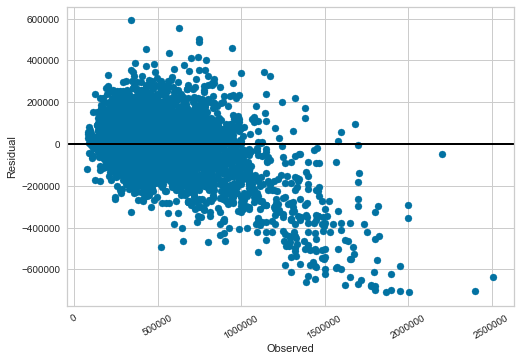

In [333]:

fig, ax = plt.subplots()

#ax.set_ylim([0,5000000])
ax.scatter(y_test,resid)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.xticks(rotation=30)

plt.show

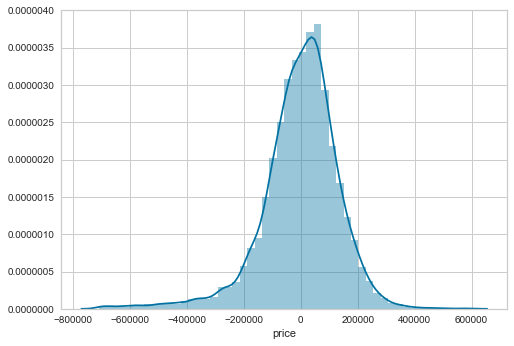

In [334]:
sns.distplot(resid)

Text(0.5, 1.0, 'Normal Check')

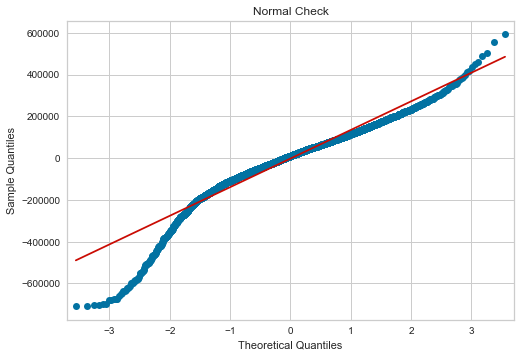

In [335]:
import statsmodels.api as sm
import pylab

sm.qqplot(resid,line='s')
plt.title('Normal Check')

## Auto correlation 

checking for autocorrelation to ensure absence of corrleation   
Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data

H0= autocorrelation is absent
when p value is greater than 0.05, the h0 is accepted

In [336]:
from statsmodels.stats import diagnostic
#Autocorrelation refers to the degree of correlation between the values of the same variables across different observations in the data

#H0= autocorrelation is absent   
#when p value is greater than 0.05, the h0 is accepted

In [337]:
diagnostic.acorr_ljungbox(result.resid,lags =1)
#returns :(statistic,p-value)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


(array([0.00109948]), array([0.97354822]))

## Check for Heteroscedasticity

h0: error terms are homoscedastic

residual should be homoscedastic

In [338]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F Statistic','p-value']
test = sms.het_goldfeldquandt(result.resid,result.model.exog)
lzip(name,test)

[('F Statistic', 1.0192010256847275), ('p-value', 0.1981165352811473)]

# With Logarithm

In [271]:
house_outlier2['price']=target_outlier2

In [272]:
house_outlier2

,sqft_living,sqft_lot,waterfront,view,bigger,living ratio,age,renovated,rooms,floor,score,wealthy_neighbourhood,price
0,1180,5650,0,0,0,0.000000,59,0,3.00,1,10.0,0,221900.0
1,2570,7242,0,0,1,5.425000,63,1,6.75,2,10.0,0,538000.0
2,770,10000,0,0,0,0.000000,82,0,2.00,1,9.0,0,180000.0
3,1960,5000,0,0,1,1.153846,49,0,12.00,1,12.0,1,604000.0
4,1680,8080,0,0,0,0.000000,28,0,6.00,1,11.0,1,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,1530,1131,0,0,0,0.000000,5,0,7.50,3,11.0,1,360000.0
21609,2310,5813,0,0,1,0.000000,1,0,10.00,2,11.0,0,400000.0
21610,1020,1350,0,0,0,0.000000,5,0,1.50,2,10.0,1,402101.0
21611,1600,2388,0,0,1,0.000000,11,0,7.50,2,11.0,1,400000.0


In [273]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p,validate=True)
price_log=transformer.fit_transform(np.array(house_outlier2['price']).reshape(1,-1))[0]

In [274]:
house_log=pd.DataFrame()
for i in house_outlier2:
    if i=='age':
        pass
    else:
        house_log[i]=transformer.fit_transform(np.array(house_outlier2[i]).reshape(1,-1))[0]
    

In [275]:
l=[]
for i in house_outlier2['age']:
    i=int(i)
    l.append(i)
house_log['age']=l

In [276]:
house_log['age']=transformer.fit_transform(np.array(house_outlier2['age']).reshape(1,-1))[0]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:165: RuntimeWarning: divide by zero encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


In [277]:
house_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21258 entries, 0 to 21257
Data columns (total 13 columns):
sqft_living              21258 non-null float64
sqft_lot                 21258 non-null float64
waterfront               21258 non-null float64
view                     21258 non-null float64
bigger                   21258 non-null float64
living ratio             21258 non-null float64
renovated                21258 non-null float64
rooms                    21258 non-null float64
floor                    21258 non-null float64
score                    21258 non-null float64
wealthy_neighbourhood    21258 non-null float64
price                    21258 non-null float64
age                      21258 non-null float64
dtypes: float64(13)
memory usage: 2.1 MB


In [278]:
np.isfinite(house_log).all()

sqft_living               True
sqft_lot                  True
waterfront                True
view                      True
bigger                    True
living ratio              True
renovated                 True
rooms                     True
floor                     True
score                     True
wealthy_neighbourhood     True
price                     True
age                      False
dtype: bool

In [279]:
inf=house_log[house_log['age']==-np.inf].index

In [280]:
house_log_=house_log.drop(inf)

In [281]:
target_log=house_log_['price']

In [282]:
house_log_.drop('price',axis=1,inplace=True)

In [283]:
target_notlog=house_outlier2.drop(inf)['price']

In [284]:
house_outlier2.drop('price',axis=1,inplace=True)

In [286]:
X_train, X_test, y_train , y_test = train_test_split(house_log_,target_notlog,test_size=0.25)

In [287]:
lm=LinearRegression() #--> creates the linear regression equation
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [288]:
#X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)


In [289]:
#X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)


In [290]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [291]:
lm.intercept_

-3196315.388744343

In [292]:
pd.DataFrame(index=X_train.columns,data=lm.coef_,columns=['Coefficient'])

,Coefficient
sqft_living,266054.428043
sqft_lot,4474.013791
waterfront,822019.692049
view,117620.466649
bigger,-33259.487165
living ratio,14347.748838
renovated,133863.333221
rooms,-34858.585175
floor,77667.003640
score,612623.828250


In [293]:
predictions=lm.predict(X_test)
predictions

array([402327.71592593, 685287.53986659, 778419.70178691, ...,
       298763.95339633, 463278.35168111, 547450.78873337])

In [294]:
metrics.r2_score(y_test,predictions)

0.5947761245821883

In [295]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 120671.77056720703
MSE: 31848961947.15931
RMSE: 178462.77468189076


In [342]:
a=[150,-200,500]

In [347]:
b=[]
for i in a :
    a=i**2
    b.append(a)

In [348]:
b

[22500, 40000, 250000]

In [350]:
312500/3

104166.66666666667

In [351]:
np.sqrt(104166)

322.7475793867399

In [296]:
import statsmodels.api as sm
from statsmodels.api import OLS
sm_lm =OLS(y_train.as_matrix(), sm.add_constant(X_train))
result=sm_lm.fit()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [297]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2150.
Date:                Mon, 06 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:22:22   Log-Likelihood:            -2.1498e+05
No. Observations:               15935   AIC:                         4.300e+05
Df Residuals:                   15922   BIC:                         4.301e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.196e+06   4.78e+04    -66.934      0.000   -3.29e+06    -3.1e+06
sqft_living            2.661e+05   7621.029     34.911      0.000    2.51e+05    2.81e+05
sqft_lot               4474.0138   1948.705      2.296      0.022     654.333    8293.695
waterfront              8.22e+05   3.02e+04     27.249      0.000    7.63e+05    8.81e+05
view                   1.176e+05   4353.017     27.020      0.000    1.09e+05    1.26e+05
bigger                -3.326e+04   4861.821     -6.841      0.000   -4.28e+04   -2.37e+04
living ratio           1.435e+04   2276.794      6.302      0.000    9884.976    1.88e+04
renovated              1.339e+05   1.04e+04     12.929      0.000    1.14e+05    1.54e+05
rooms                 -3.486e+04   5015.107     -6.951      0.000   -4.47e+04    -2.5e+04
floor                  7.767e+04   8234.010      9.432      0.000    6.15e+04    9.38e+04
score                  6.126e+05   1.88e+04     32.641      0.000    5.76e+05    6.49e+05
wealthy_neighbourhood  2.958e+05   4429.572     66.773      0.000    2.87e+05    3.04e+05
age                     1.04e+04   1803.067      5.768      0.000    6865.467    1.39e+04
==============================================================================
Omnibus:                     5133.473   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35758.685
Skew:                           1.368   Prob(JB):                         0.00
Kurtosis:                       9.809   Cond. No.                         451.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [298]:
try_normal(result.resid)

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 364.3304177025493},
 'Shapiro p value': 0.0,
 'K^2': 0.0}

In [299]:
res=result.resid


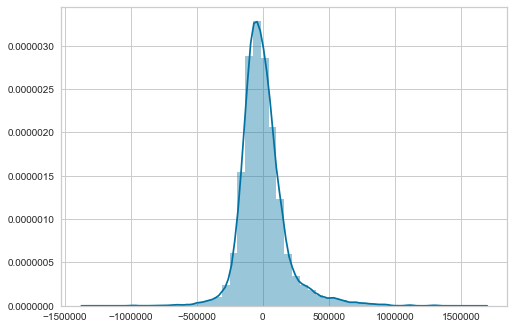

In [300]:
sns.distplot(result.resid)

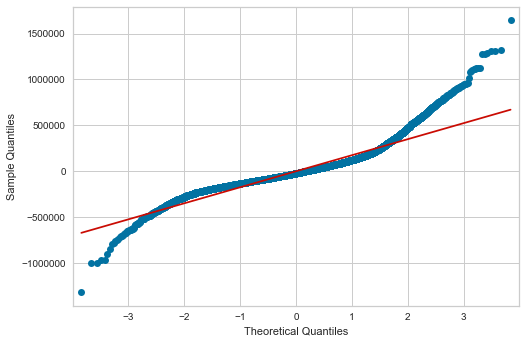

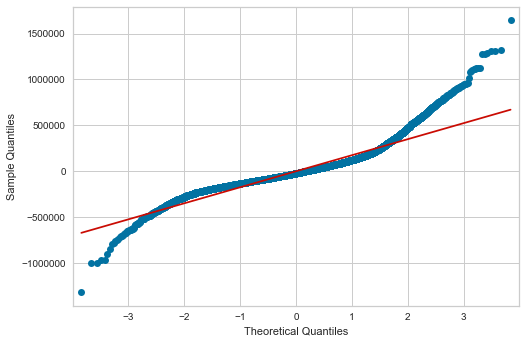

In [301]:
sm.qqplot(result.resid,line='s')

In [303]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F Statistic','p-value']
test = sms.het_goldfeldquandt(result.resid,result.model.exog)
lzip(name,test)

[('F Statistic', 0.9535083898893585), ('p-value', 0.983115556788639)]

# Ridge Regression

In [197]:
#house_outlier2.drop('price',axis=1,inplace=True)

In [198]:
X_train, X_test, y_train , y_test = train_test_split(house_outlier2,target_outlier2,test_size=0.25)

In [199]:
from sklearn.linear_model import Ridge

In [200]:
def RidgeReg(start,stop,step,X_train,y_train):
    for alpha in np.linspace(start,stop,step):
        rlm=Ridge(alpha=alpha)
        rlm.fit(X_train,y_train)
        predicted = rlm.predict(X_test)
        _ = plt.plot(range(len(X_train.columns)), rlm.coef_)
        _ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation = 60)
        _ = plt.ylabel('Coefficients')
        plt.show()
        print("Evaluation for Lasso Regression, alpha ={}".format(alpha))
        print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
        print('MSE: ', metrics.mean_squared_error(y_test, predicted))
        print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
        print('R2 Score: ', metrics.r2_score(y_test,predicted))

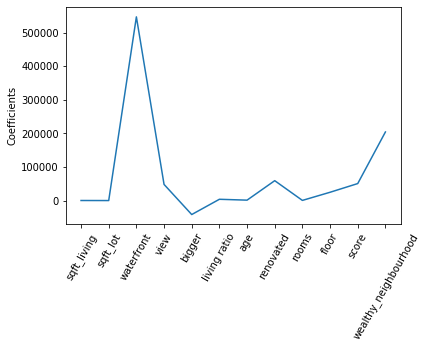

Evaluation for Lasso Regression, alpha =0.0
MAE:  98066.94032620166
MSE:  18994586627.84924
RMSE:  137820.84975739062
R2 Score:  0.78231049892696


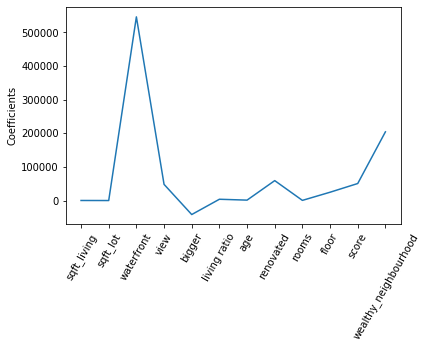

Evaluation for Lasso Regression, alpha =0.1111111111111111
MAE:  98067.93891352802
MSE:  18995296887.76748
RMSE:  137823.4264839163
R2 Score:  0.7823023589168475


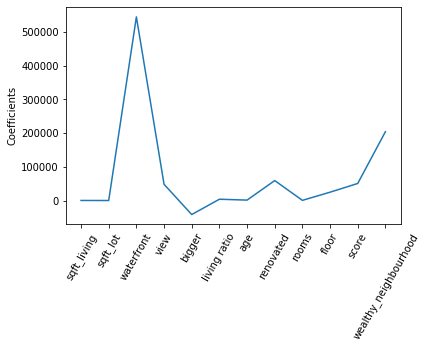

Evaluation for Lasso Regression, alpha =0.2222222222222222
MAE:  98068.9337469414
MSE:  18996013428.824562
RMSE:  137826.02594874657
R2 Score:  0.7822941469210684


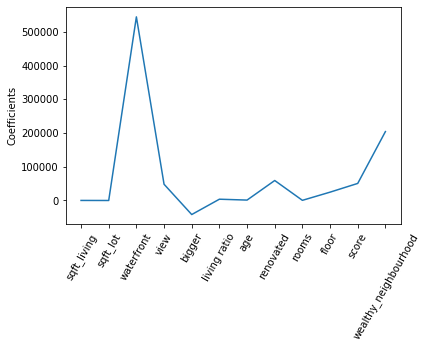

Evaluation for Lasso Regression, alpha =0.3333333333333333
MAE:  98069.92484584566
MSE:  18996736174.394016
RMSE:  137828.6478726176
R2 Score:  0.7822858638178085


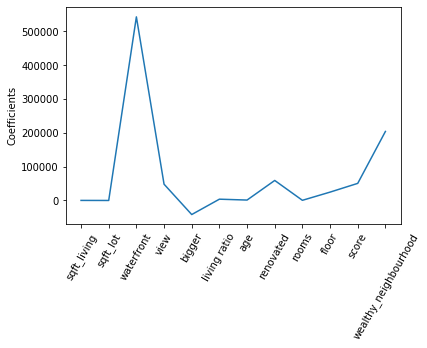

Evaluation for Lasso Regression, alpha =0.4444444444444444
MAE:  98070.91222951082
MSE:  18997465048.681686
RMSE:  137831.29197929506
R2 Score:  0.7822775104757149


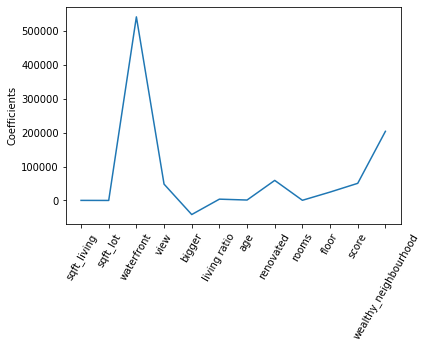

Evaluation for Lasso Regression, alpha =0.5555555555555556
MAE:  98071.89591707439
MSE:  18998199976.715992
RMSE:  137833.95799553895
R2 Score:  0.7822690877540076


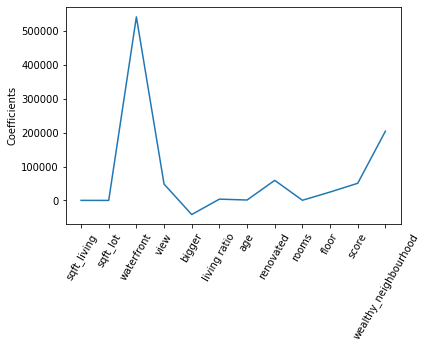

Evaluation for Lasso Regression, alpha =0.6666666666666666
MAE:  98072.87592754234
MSE:  18998940884.338245
RMSE:  137836.6456510686
R2 Score:  0.78226059650259


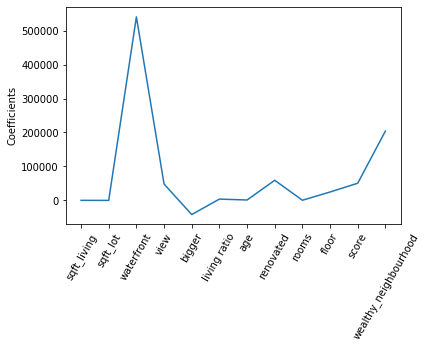

Evaluation for Lasso Regression, alpha =0.7777777777777777
MAE:  98073.85227979034
MSE:  18999687698.19316
RMSE:  137839.35467852844
R2 Score:  0.7822520375621584


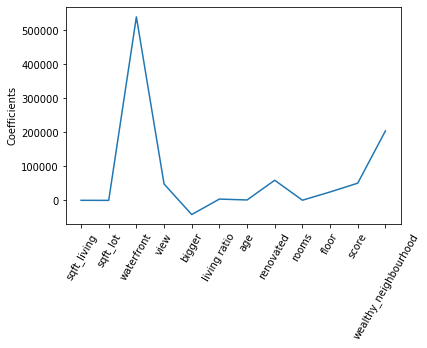

Evaluation for Lasso Regression, alpha =0.8888888888888888
MAE:  98074.82499256487
MSE:  19000440345.719456
RMSE:  137842.08481345404
R2 Score:  0.7822434117643091


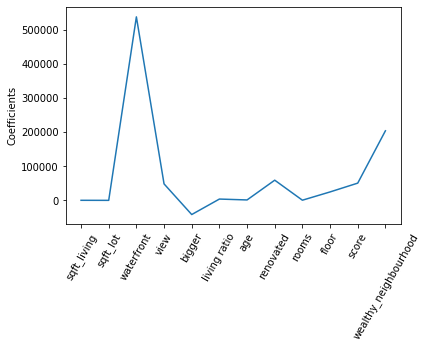

Evaluation for Lasso Regression, alpha =1.0
MAE:  98075.79408448428
MSE:  19001198755.140568
RMSE:  137844.83579423846
R2 Score:  0.7822347199316452


In [201]:
RidgeReg(0,1,10,X_train,y_train)

# Lasso Regression

In [202]:
from sklearn.linear_model import Lasso

In [203]:
np.linspace(0.1,1,10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [204]:
def LassoReg(start,stop,step,X_train,y_train):
    for alpha in np.linspace(start,stop,step):
        llm=Lasso(alpha=alpha)
        llm.fit(X_train,y_train)
        predicted = llm.predict(X_test)
        _ = plt.plot(range(len(X_train.columns)), llm.coef_)
        _ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation = 60)
        _ = plt.ylabel('Coefficients')
        plt.show()
        print("Evaluation for Lasso Regression, alpha ={}".format(alpha))
        print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
        print('MSE: ', metrics.mean_squared_error(y_test, predicted))
        print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
        print('R2 Score: ', metrics.r2_score(y_test,predicted))
        

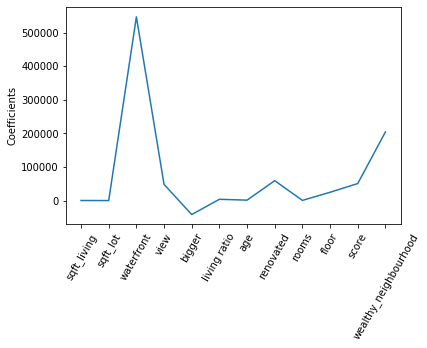

Evaluation for Lasso Regression, alpha =0.1
MAE:  98066.95507673877
MSE:  18994609336.492508
RMSE:  137820.93214200993
R2 Score:  0.7823102386721137


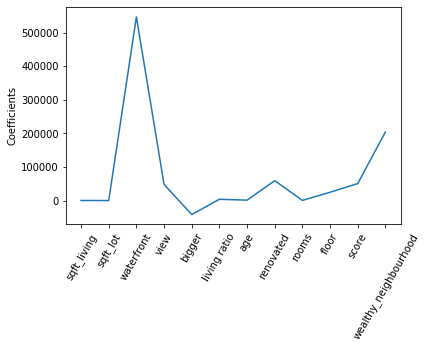

Evaluation for Lasso Regression, alpha =0.2
MAE:  98066.96982801132
MSE:  18994632051.8679
RMSE:  137821.01455100343
R2 Score:  0.7823099783401133


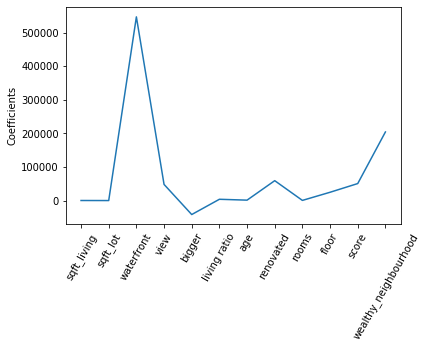

Evaluation for Lasso Regression, alpha =0.30000000000000004
MAE:  98066.98457861155
MSE:  18994654773.062214
RMSE:  137821.09698105807
R2 Score:  0.7823097179414243


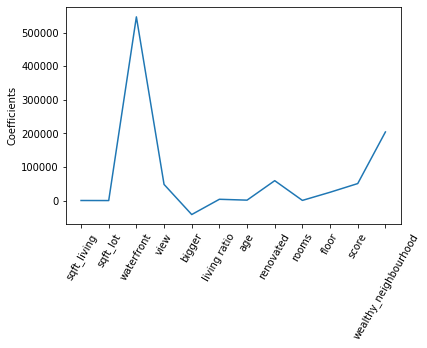

Evaluation for Lasso Regression, alpha =0.4
MAE:  98066.99932813425
MSE:  18994677499.81266
RMSE:  137821.17943122043
R2 Score:  0.7823094574790588


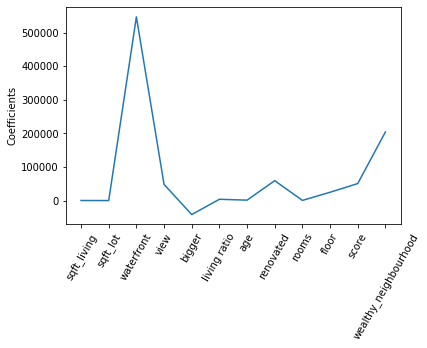

Evaluation for Lasso Regression, alpha =0.5
MAE:  98067.01408052233
MSE:  18994700234.676727
RMSE:  137821.26191076878
R2 Score:  0.7823091969237063


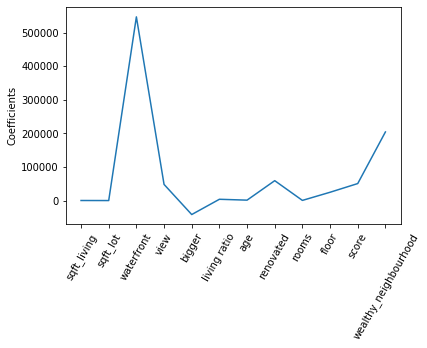

Evaluation for Lasso Regression, alpha =0.6
MAE:  98067.0288283181
MSE:  18994722972.817154
RMSE:  137821.34440215403
R2 Score:  0.7823089363308046


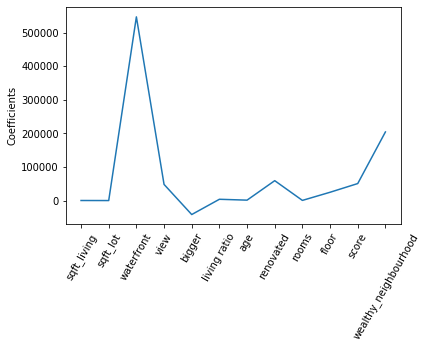

Evaluation for Lasso Regression, alpha =0.7000000000000001
MAE:  98067.04358070619
MSE:  18994745720.19127
RMSE:  137821.42692698864
R2 Score:  0.7823086756320793


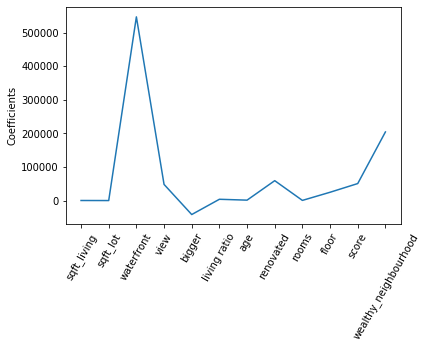

Evaluation for Lasso Regression, alpha =0.8
MAE:  98067.05833309426
MSE:  18994768473.820404
RMSE:  137821.5094744663
R2 Score:  0.7823084148616677


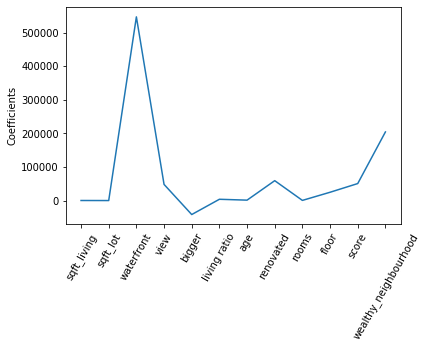

Evaluation for Lasso Regression, alpha =0.9
MAE:  98067.07307812244
MSE:  18994791228.930965
RMSE:  137821.59202726895
R2 Score:  0.782308154074278


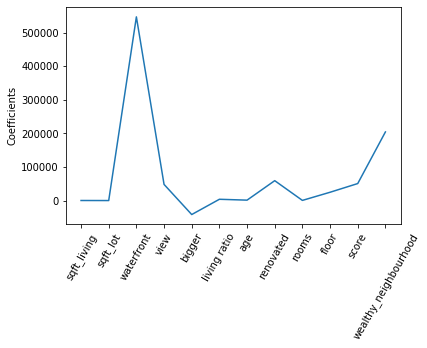

Evaluation for Lasso Regression, alpha =1.0
MAE:  98067.0878305105
MSE:  18994813995.070152
RMSE:  137821.67462003266
R2 Score:  0.7823078931604934


In [205]:
LassoReg(0.1,1,10,X_train,y_train)

# Polynomial Regression

In [212]:
def polynomial_regression_model(degree,X_train,X_test,y_train,y_test):
    from sklearn.preprocessing import PolynomialFeatures
    poly_feature=PolynomialFeatures(degree=degree)
    
    #transform existing variables to polynomial
    X_train_poly = poly_feature.fit_transform(X_train)
    #X_train_df=pd.DataFrame(X_train_poly)
    
    #fit the transformed features to Linear Regression
    poly_model=LinearRegression()
    poly_model.fit(X_train_poly,y_train)
    
    #predicting dataset from training data
    y_train_predicted=poly_model.predict(X_train_poly)
    
    
    #predicting data set from test data
    y_test_predict = poly_model.predict(poly_feature.fit_transform(X_test))
    
    #evaluate model on training dataset
    rmse_train=np.sqrt(metrics.mean_squared_error(y_train,y_train_predicted))
    r2_train=metrics.r2_score(y_train,y_train_predicted)
    
    #evaluate model on test dataset
    rmse_test=np.sqrt(metrics.mean_squared_error(y_test,y_test_predict))
    r2_test=metrics.r2_score(y_test,y_test_predict)
    
    #vif
    
    #vif =[variance_inflation_factor(X_train_df.values,j) for j in range(X_train_df.shape[1])]
    #pd.set_option('display.max_rows', None)
    #vif_df=pd.DataFrame(vif,index = X_train_poly.columns,columns=['VIF'])
    
    #return(vif_df)
    
    
    print('The model performace on the training data set')
    print("..............................................")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 values of training set is{}".format(r2_train))
    
    print("\n")
    
    print('The model performace on the test data set')
    print("..............................................")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 values of test set is {}".format(r2_test))
    
    
    
    
    

In [213]:
polynomial_regression_model(3,X_train,X_test,y_train,y_test)
    

The model performace on the training data set
..............................................
RMSE of training set is 119349.56754964872
R2 values of training set is0.8156546469463097


The model performace on the test data set
..............................................
RMSE of test set is 126316.07601645484
R2 values of test set is 0.8171374004819432


# Evaluation

Cross validation scores: [0.76283444 0.7777087  0.75484366 0.76634312 0.75953143 0.7625055
 0.74485221 0.76063813 0.75914887 0.76685564]


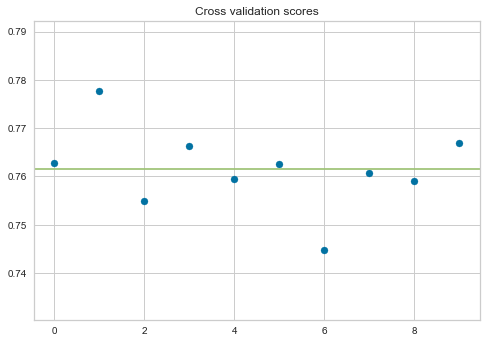

In [215]:
from sklearn.model_selection import cross_val_score , cross_validate
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import KFold



scores = cross_val_score(estimator=ln,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1,
                        scoring='r2')

print('Cross validation scores: {}'.format(scores))

plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

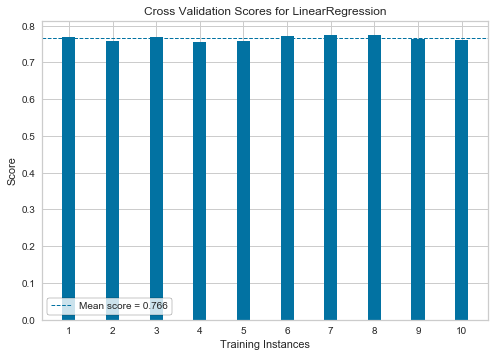

In [217]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import cv_scores
from sklearn.model_selection import KFold


# Instantiate the regression model and visualizer
cv = KFold(n_splits=10, random_state=42)

model = lm
visualizer = cv_scores(X=house_outlier2,y=target_outlier2,model=ln, cv=cv, scoring='r2')

In [218]:
import pickle

In [340]:
filename = 'King_lm_model.sav'
pickle.dump(ln,open(filename,'wb'))

In [352]:
X_train



,sqft_living,sqft_lot,waterfront,view,bigger,living ratio,age,renovated,floor,score,wealthy_neighbourhood
0,-1.086450,-0.176550,-0.069208,-0.295391,-0.909203,-0.493735,0.634751,-0.209284,-0.962780,-0.842692,-0.911507
1,-0.090616,-0.354214,-0.069208,-0.295391,1.099865,2.017360,-1.272237,-0.209284,0.841782,-0.024031,-0.911507
2,-1.503311,0.173605,-0.069208,-0.295391,-0.909203,0.698288,0.839071,-0.209284,-0.962780,-2.480012,-0.911507
3,4.379056,3.428819,-0.069208,-0.295391,1.099865,-0.493735,-1.170076,-0.209284,0.841782,2.431949,1.097084
4,-0.044299,-0.147341,-0.069208,-0.295391,1.099865,0.781156,0.123951,-0.209284,-0.962780,0.794629,-0.911507
...,...,...,...,...,...,...,...,...,...,...,...
15938,-0.820123,-0.186042,-0.069208,2.453030,-0.909203,-0.493735,0.702858,-0.209284,-0.962780,-0.024031,1.097084
15939,-0.947497,-0.391533,-0.069208,-0.295391,-0.909203,-0.493735,-1.204130,-0.209284,0.841782,-0.024031,1.097084
15940,-0.217991,-0.378280,-0.069208,-0.295391,1.099865,-0.493735,-1.442503,-0.209284,2.646344,-0.024031,1.097084
15941,-0.380103,-0.316042,-0.069208,-0.295391,-0.909203,-0.493735,-0.727383,-0.209284,0.841782,-0.842692,-0.911507


In [353]:
input=[1500,2000,0,3,1,1.4,30,0,2,15,1]

In [356]:
pd.DataFrame(input).T

,0,1,2,3,4,5,6,7,8,9,10
0,1500.0,2000.0,0.0,3.0,1.0,1.4,30.0,0.0,2.0,15.0,1.0


In [358]:
ln.predict([input])

array([2.20276127e+08])

In [ ]:
select bedroom as bedroom ,avg(price) as average_price from datahouse group by bedroom

In [ ]:
True positive+true negative/semua data

In [ ]:
true negative/true negative + false positive